<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [88]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [89]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [90]:
data = pd.read_csv('./train.csv')

### Получим информацию о датасете (характеристика столбцов, количество nan-ов, размерность датасета и т.д.)

In [91]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

## Выберем случайные строки датасета с помощью фунции sample

In [92]:
data.sample(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3768,1,35.55,35.55,Male,0,No,No,No,No phone service,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,1
1078,72,25.20,1798.9,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),0
1827,70,45.25,3264.45,Male,1,No,No,No,No phone service,DSL,No,No,No,No,Yes,Yes,One year,Yes,Electronic check,1
3088,43,56.15,2499.3,Female,0,Yes,Yes,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,No,Electronic check,1
579,53,108.25,5935.1,Female,0,Yes,Yes,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),0
2493,25,76.15,1992.95,Female,0,No,No,Yes,No,DSL,Yes,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),0
3581,68,70.95,4741.45,Male,0,Yes,No,Yes,No,DSL,Yes,Yes,Yes,No,No,Yes,Two year,No,Bank transfer (automatic),0
1889,60,60.80,3603.45,Female,0,Yes,No,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
4933,50,103.85,5017.9,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),1
5209,25,104.95,2566.5,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),1


**На первый взгляд нет очевидных пропусков или ошибок в данных, числовые признаки float или int. В категориальных признаках IsSeniorCitizen, которая обозначает является ли пенсионером наш клиент, вместо Yes и No используют 1 и 0 соответственно**

### *С помощью функции info,которая описывает датасет и столбцы в нем, количество не-null в каждом из столбцов, более детально проверим тип объектов в датасете и потенциальные пропуски.*

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Если присмотримся, то заметим, что признак TotalSpent имеет тип object вместо float или int.

**Приведем его к нужному типу с помощью функии pd.to_numeric().**

In [94]:
data.TotalSpent = pd.to_numeric(data.TotalSpent, errors='coerce')

Проверим результат преобразования:

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Значения признаков TotalSpent поменяли свой тип.

Но в этом столбце появились значания null.

# Таблица количество nan в каждом из столбцов датасета

In [96]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

**Заменим отсутствующие значения в столбце TotalSpent на значения медианы значений данного столбца (можно также заменить на среднее, 0 или вообще выбросить**

In [97]:
data.TotalSpent=data.TotalSpent.fillna(data.TotalSpent.median())

Проверим правильность операции:

In [98]:
print('Nan count is',data.TotalSpent.isna().sum())

Nan count is 0


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном графике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

### Построим гистограмму распределения численных признаков

In [99]:
num_cols

['ClientPeriod', 'MonthlySpending', 'TotalSpent']

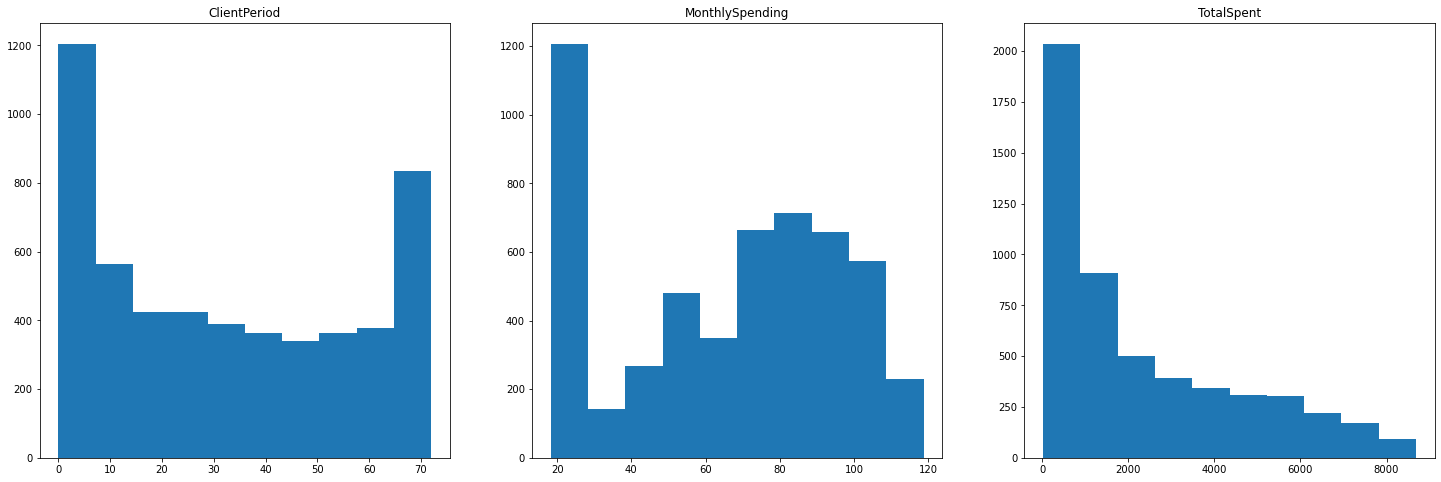

In [100]:
fig, ax = plt.subplots(nrows=1,ncols=len(num_cols),figsize=(25,8))
for i, title in enumerate(num_cols):
    ax[i].hist(data[title])
    ax[i].set_title(title)
plt.show()

*По графикам можно сказать, что в значениях численных нет аномальных выбросов и сильного дизбаланса в их распределении.*

### Категориальные признаки

In [101]:
cat_cols

['Sex',
 'IsSeniorCitizen',
 'HasPartner',
 'HasChild',
 'HasPhoneService',
 'HasMultiplePhoneNumbers',
 'HasInternetService',
 'HasOnlineSecurityService',
 'HasOnlineBackup',
 'HasDeviceProtection',
 'HasTechSupportAccess',
 'HasOnlineTV',
 'HasMovieSubscription',
 'HasContractPhone',
 'IsBillingPaperless',
 'PaymentMethod']

**Выведем количество значений для каждого признака категориальных значений с помощью .value_counts()**

In [102]:
for i, title in enumerate(cat_cols):
    print('Categorical feature -',title,':\n',data[title].value_counts(),'\n')

Categorical feature - Sex :
 Male      2655
Female    2627
Name: Sex, dtype: int64 

Categorical feature - IsSeniorCitizen :
 0    4440
1     842
Name: IsSeniorCitizen, dtype: int64 

Categorical feature - HasPartner :
 No     2705
Yes    2577
Name: HasPartner, dtype: int64 

Categorical feature - HasChild :
 No     3676
Yes    1606
Name: HasChild, dtype: int64 

Categorical feature - HasPhoneService :
 Yes    4761
No      521
Name: HasPhoneService, dtype: int64 

Categorical feature - HasMultiplePhoneNumbers :
 No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64 

Categorical feature - HasInternetService :
 Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64 

Categorical feature - HasOnlineSecurityService :
 No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64 

Categorical feature - HasOnlineBack

*Вспоминаем что вместо категориальных признаков Yes/No в столбце'IsSeniorCitizen' ипользуются int числа 1/0.
Заменим их на str значения для более красивой визуализации.*

In [103]:
citizen_map = {1: 'Yes', 0: 'No'}
data['IsSeniorCitizen'] = data['IsSeniorCitizen'].map(citizen_map)
data['IsSeniorCitizen'].value_counts()

No     4440
Yes     842
Name: IsSeniorCitizen, dtype: int64

### Построим круговые диаграммы распределения признаков по категориальным данным

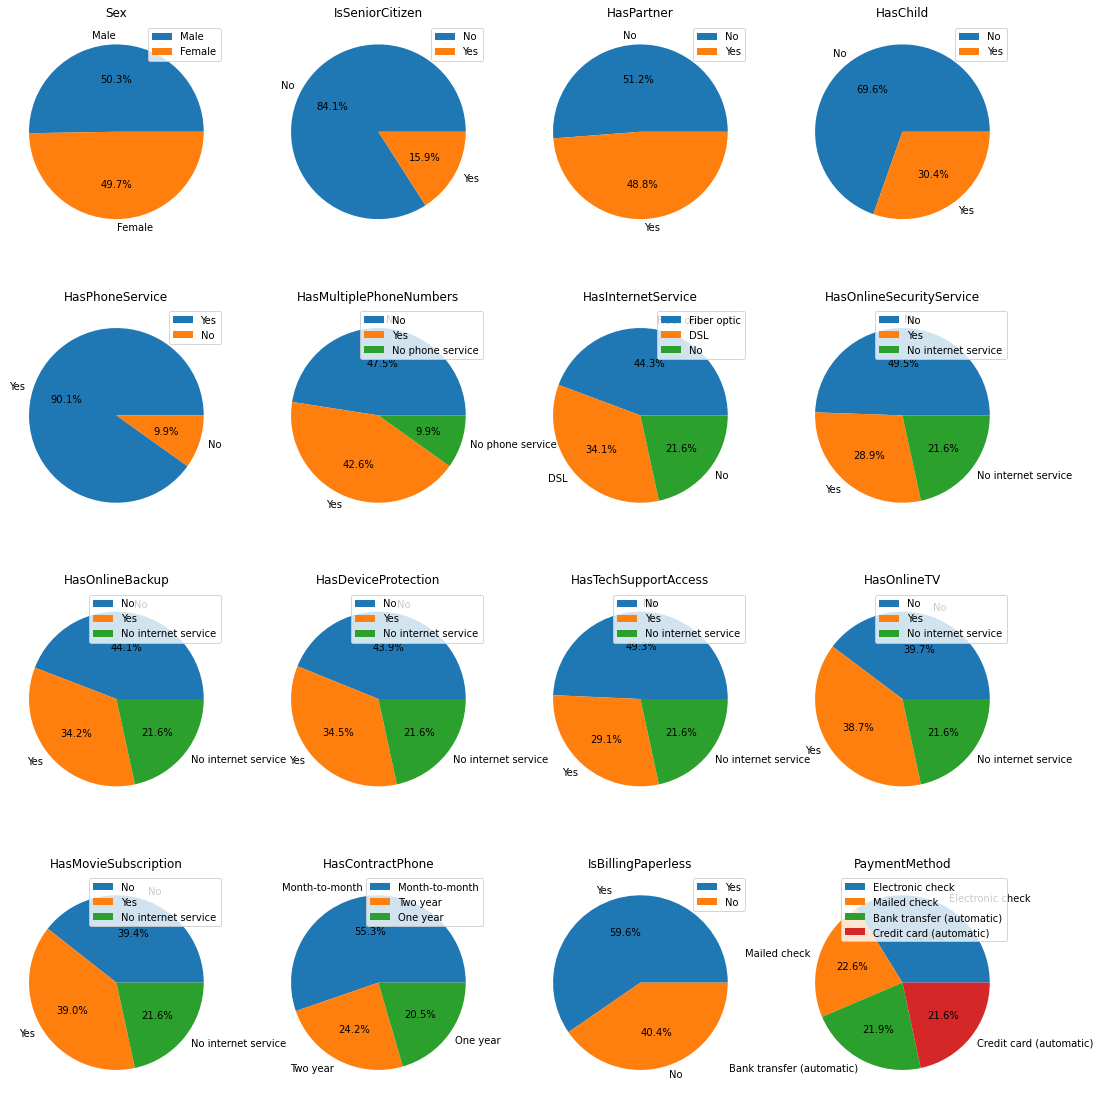

In [104]:
fig, ax = plt.subplots(nrows=4,ncols=4,figsize=(18,20))
for i,title in enumerate(cat_cols):
    data_cnts=data[cat_cols[i]].value_counts()
    ax[i//4,i%4].pie(data_cnts, labels = data_cnts.index, autopct='%1.1f%%')
    ax[i//4,i%4].legend()
    ax[i//4,i%4].set_title(title)
plt.show()

### Посмотрим на распределение целевой переменной

In [105]:
data[target_col].value_counts()

0    3898
1    1384
Name: Churn, dtype: int64

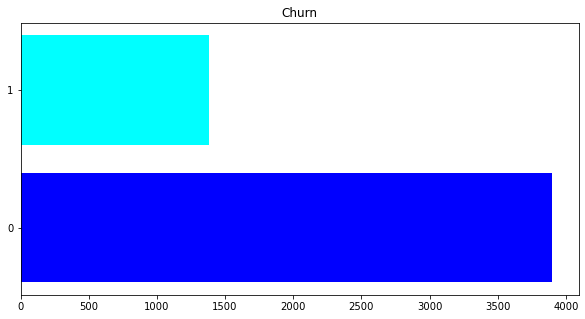

In [106]:
ss=data[target_col].value_counts()
fig, ax = plt.subplots(figsize=(10,5))
c = ['blue', 'cyan']
ax.barh(ss.index,ss.values,color=c)
ax.set_yticks([0,1])
ax.set_title(target_col)
plt.show()

In [107]:
print('Отношение класса 0 и класса 1 целевой переменной: ',
      (data[target_col].value_counts()[0]/data[target_col].value_counts()[1]))

Отношение класса 0 и класса 1 целевой переменной:  2.816473988439306


### *Наблюдается некоторый дизбаланс между количеством признаков целевой переменной, но не считаем его критичным, так как отношение меньше 20*

# Для понимания зависимости между числовыми переменными и целевой переменной, построим график их корреляций

In [108]:
data.corr().style.background_gradient(cmap='seismic').set_precision(3)

,ClientPeriod,MonthlySpending,TotalSpent,Churn
ClientPeriod,1.000,0.249,0.826,-0.351
MonthlySpending,0.249,1.000,0.652,0.185
TotalSpent,0.826,0.652,1.000,-0.201
Churn,-0.351,0.185,-0.201,1.000


### **Аномальных корреляций между числовыми признаками не обнаружено**

*Ожидаемо период отношений с клиентом очень сильно связан с общим количеством затрат это клиента на наши услуги, то же самое можно и сказать про ежемесечные затраты.*

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [109]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

*С помощью pd.get_dummies() до генерируем One-hot признаки для нашего датасета.*

In [110]:
dummy_features=pd.get_dummies(data[cat_cols])
X=pd.concat([data[num_cols],dummy_features],axis=1)
y=data[target_col]
print(X.shape,y.shape)

(5282, 46) (5282,)


#### Разделим наш датасет на train и validation

In [111]:
X_train, X_vd, y_train, y_vd = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    random_state=42)

Отнормируем наши признаки, следя за тем, чтобы данные из validation не проникли в test выборку

In [112]:
scaler=StandardScaler()
X_trainsc = scaler.fit_transform(X_train)
X_vdsc = scaler.transform(X_vd)
print(X_trainsc.shape,X_vdsc.shape)

(3697, 46) (1585, 46)


Вопрос к проверяющим. Можно ли было применять StandardScaler() к датасету с one-hot-encoding'ом (как в семинаре model_selection_ensembles в главе Нормировка признаков), или нужно было отдельно применить его только к числовым признакам?

**Воспользуемся LogisticRegressionCV(), чтобы определить наилучшее значение гиперпараметра C.**

In [126]:
cs=[100, 10, 1, 0.1, 0.01, 0.001]
log=LogisticRegressionCV(Cs=cs, max_iter=1000, cv=3, scoring='roc_auc', n_jobs=-1, refit=True, random_state=42)
log.fit(X_train, y_train)
print('Best C param is',int(log.C_[0]))

Best C param is 100


*Оценим точность модели с параметром C=100 на валидационной выборке*

In [127]:
roc_auc_score(y_vd, log.predict_proba(X_vd)[:, 1])

0.8328874462716656

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

### Разделим оригинальную обучающую выборку (без one-hot-encoding'а) на train и validation в соотношении 0.7 к 0.3.

In [115]:
import catboost
X_og=data.iloc[:, :-1]
y=data[target_col]
X_ogtrain, X_ogvd, y_ogtrain, y_ogvd = train_test_split(X_og, y, 
                                                    train_size=0.7,
                                                    random_state=42)

Протестируем catboost с стандартными параметрами и ограничением 200 на количество деревьев

In [116]:
boosting_model = catboost.CatBoostClassifier(iterations=200,cat_features=cat_cols)
boosting_model.fit(X_ogtrain, y_ogtrain)

Learning rate set to 0.07877
0:	learn: 0.6482367	total: 25.2ms	remaining: 5.01s
1:	learn: 0.6168329	total: 51.5ms	remaining: 5.1s
2:	learn: 0.5862711	total: 76.8ms	remaining: 5.04s
3:	learn: 0.5539368	total: 110ms	remaining: 5.39s
4:	learn: 0.5320107	total: 126ms	remaining: 4.93s
5:	learn: 0.5122325	total: 150ms	remaining: 4.86s
6:	learn: 0.4975691	total: 164ms	remaining: 4.53s
7:	learn: 0.4834125	total: 188ms	remaining: 4.5s
8:	learn: 0.4733653	total: 210ms	remaining: 4.47s
9:	learn: 0.4622326	total: 250ms	remaining: 4.75s
10:	learn: 0.4535511	total: 275ms	remaining: 4.73s
11:	learn: 0.4465989	total: 303ms	remaining: 4.74s
12:	learn: 0.4401222	total: 329ms	remaining: 4.74s
13:	learn: 0.4350759	total: 357ms	remaining: 4.74s
14:	learn: 0.4310828	total: 385ms	remaining: 4.74s
15:	learn: 0.4294801	total: 393ms	remaining: 4.52s
16:	learn: 0.4270763	total: 408ms	remaining: 4.39s
17:	learn: 0.4226485	total: 435ms	remaining: 4.4s
18:	learn: 0.4205686	total: 453ms	remaining: 4.31s
19:	learn: 0

165:	learn: 0.3387259	total: 4.28s	remaining: 878ms
166:	learn: 0.3378288	total: 4.31s	remaining: 852ms
167:	learn: 0.3371820	total: 4.33s	remaining: 825ms
168:	learn: 0.3366076	total: 4.36s	remaining: 800ms
169:	learn: 0.3362541	total: 4.38s	remaining: 774ms
170:	learn: 0.3362068	total: 4.41s	remaining: 748ms
171:	learn: 0.3360285	total: 4.43s	remaining: 721ms
172:	learn: 0.3352542	total: 4.46s	remaining: 695ms
173:	learn: 0.3346419	total: 4.48s	remaining: 669ms
174:	learn: 0.3341369	total: 4.5s	remaining: 644ms
175:	learn: 0.3339883	total: 4.53s	remaining: 618ms
176:	learn: 0.3338135	total: 4.56s	remaining: 593ms
177:	learn: 0.3334423	total: 4.6s	remaining: 568ms
178:	learn: 0.3328654	total: 4.62s	remaining: 542ms
179:	learn: 0.3321439	total: 4.64s	remaining: 516ms
180:	learn: 0.3315733	total: 4.67s	remaining: 490ms
181:	learn: 0.3315230	total: 4.69s	remaining: 464ms
182:	learn: 0.3309530	total: 4.72s	remaining: 438ms
183:	learn: 0.3305396	total: 4.74s	remaining: 413ms
184:	learn: 0.

In [117]:
train_auc=roc_auc_score(y_ogtrain,boosting_model.predict_proba(X_ogtrain)[:,1])
print(train_auc)

0.8976075498255544


**Точность на валидационной выборке:**

In [118]:
vd_auc=roc_auc_score(y_ogvd,boosting_model.predict_proba(X_ogvd)[:,1])
vd_auc

0.8289611042784024

### Для того чтобы увеличить точность на валидационной выборке, протестируем различные параметры, и выберем те, которые обеспечивают наибольшее значение ROC AUC

In [3]:
boosting_model = catboost.CatBoostClassifier(cat_features=cat_cols,eval_metric='AUC')
param_grid={
    'learning_rate': [0.05, 0.02, 0.03],
    'depth': [4, 5, 7],
    'iterations':[170, 200, 120]
}
grid_search_result=boosting_model.grid_search(param_grid,X_ogtrain,y_ogtrain,plot=True)

##### Выведем параметры, которые обеспечивают наибольшее значение метрики ROC AUC

In [120]:
grid_search_result['params']

{'depth': 3, 'iterations': 200, 'learning_rate': 0.05}

*Построим модель градиентного бустинга с этими параметрами*

In [121]:
boosting_model_s = catboost.CatBoostClassifier(depth=3,iterations=200,learning_rate=0.05,cat_features=cat_cols)
boosting_model_s.fit(X_ogtrain, y_ogtrain)

0:	learn: 0.6683819	total: 17.5ms	remaining: 3.49s
1:	learn: 0.6458980	total: 33.6ms	remaining: 3.32s
2:	learn: 0.6256657	total: 46.4ms	remaining: 3.04s
3:	learn: 0.6079321	total: 62.9ms	remaining: 3.08s
4:	learn: 0.5914460	total: 77.1ms	remaining: 3s
5:	learn: 0.5772707	total: 89.2ms	remaining: 2.88s
6:	learn: 0.5610805	total: 102ms	remaining: 2.81s
7:	learn: 0.5469150	total: 115ms	remaining: 2.75s
8:	learn: 0.5342445	total: 128ms	remaining: 2.71s
9:	learn: 0.5232647	total: 141ms	remaining: 2.67s
10:	learn: 0.5119648	total: 152ms	remaining: 2.61s
11:	learn: 0.5024697	total: 165ms	remaining: 2.58s
12:	learn: 0.4949736	total: 179ms	remaining: 2.57s
13:	learn: 0.4873053	total: 193ms	remaining: 2.56s
14:	learn: 0.4816122	total: 208ms	remaining: 2.56s
15:	learn: 0.4761812	total: 219ms	remaining: 2.52s
16:	learn: 0.4712057	total: 242ms	remaining: 2.6s
17:	learn: 0.4658001	total: 279ms	remaining: 2.82s
18:	learn: 0.4612152	total: 295ms	remaining: 2.81s
19:	learn: 0.4580095	total: 310ms	remai

167:	learn: 0.3961190	total: 2.41s	remaining: 459ms
168:	learn: 0.3961141	total: 2.43s	remaining: 447ms
169:	learn: 0.3960723	total: 2.45s	remaining: 433ms
170:	learn: 0.3960466	total: 2.47s	remaining: 419ms
171:	learn: 0.3960317	total: 2.48s	remaining: 404ms
172:	learn: 0.3959435	total: 2.49s	remaining: 389ms
173:	learn: 0.3958770	total: 2.5s	remaining: 374ms
174:	learn: 0.3957956	total: 2.52s	remaining: 360ms
175:	learn: 0.3956068	total: 2.53s	remaining: 345ms
176:	learn: 0.3955347	total: 2.54s	remaining: 330ms
177:	learn: 0.3955152	total: 2.55s	remaining: 316ms
178:	learn: 0.3954763	total: 2.56s	remaining: 301ms
179:	learn: 0.3954763	total: 2.57s	remaining: 286ms
180:	learn: 0.3953030	total: 2.58s	remaining: 271ms
181:	learn: 0.3952302	total: 2.6s	remaining: 257ms
182:	learn: 0.3951397	total: 2.61s	remaining: 243ms
183:	learn: 0.3950559	total: 2.62s	remaining: 228ms
184:	learn: 0.3948994	total: 2.64s	remaining: 214ms
185:	learn: 0.3946260	total: 2.65s	remaining: 199ms
186:	learn: 0.

In [122]:
vd_auc=roc_auc_score(y_ogvd,boosting_model_s.predict_proba(X_ogvd)[:,1])
vd_auc

0.8376199774309298

### Эта модель обеспечивает наибольшую точность на вальдационной выборке, будем использовать ее для конечного предсказания на датасете test







# Предсказания

*Воспользуемся улучшенной моделью градиентного бустинга*

In [123]:
best_model = boosting_model_s

Проверим тестовые данные на пропуски, если они есть, то заменяем на значие медианы.

In [124]:
X_test = pd.read_csv('./test.csv')
X_test.TotalSpent = pd.to_numeric(X_test.TotalSpent, errors='coerce')
print('Intial NaN count is',X_test.TotalSpent.isna().sum())
X_test.TotalSpent=X_test.TotalSpent.fillna(X_test.TotalSpent.median())
print('NaN count is',X_test.TotalSpent.isna().sum())

Intial NaN count is 2
NaN count is 0


In [125]:
submission = pd.read_csv('./submission.csv')
submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.head()
submission.to_csv('./my_submission.csv', index=False)

### Скор данной модели на Kaggle = 0.85123

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.